# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [3]:
df = pd.read_csv("data/AviationData_cleaned.csv", low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [4]:
df["Size.Group"] = np.where(
    df["Estimated.Total.Occupants"] <= 20,
    "Small (<=20)",
    "Large (>20)"
)

small_df = df[df["Size.Group"] == "Small (<=20)"].copy()
large_df = df[df["Size.Group"] == "Large (>20)"].copy()
print("Total rows:", len(df))
print("Small rows:", len(small_df))
print("Large rows:", len(large_df))

Total rows: 16539
Small rows: 16077
Large rows: 462


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

<Axes: xlabel='mean_fatal_serious_rate', ylabel='Make.Clean'>

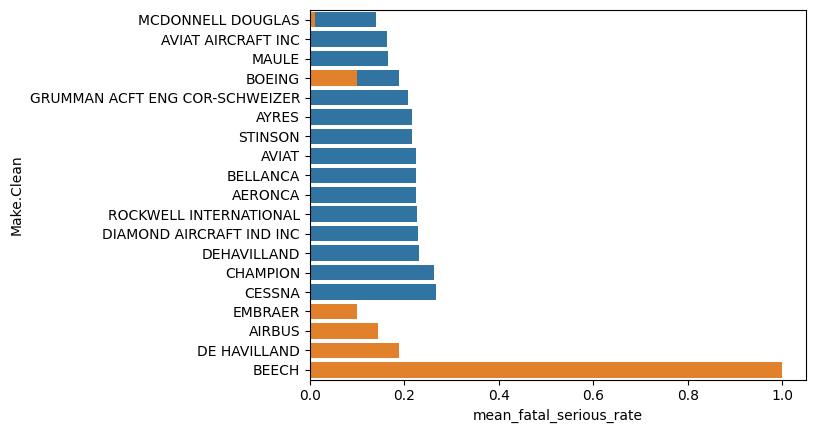

In [7]:
def top_safe_makes(frame, group_label):
    out = (
        frame.groupby("Make.Clean", dropna=True)
        .agg(
            n_events=("Event.Id", "count"),
            mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
        )
        .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
        .head(15)
        .reset_index()
    )
    out["Size.Group"] = group_label
    return out

small_top15 = top_safe_makes(small_df, "Small (<=20)")
large_top15 = top_safe_makes(large_df, "Large (>20)")

sns.barplot(
    data=small_top15.sort_values("mean_fatal_serious_rate", ascending=True),
    x="mean_fatal_serious_rate",
    y="Make.Clean"
)

sns.barplot(
    data=large_top15.sort_values("mean_fatal_serious_rate", ascending=True),
    x="mean_fatal_serious_rate",
    y="Make.Clean"
)

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

<Axes: xlabel='Fatal.Serious.Rate', ylabel='Make.Clean'>

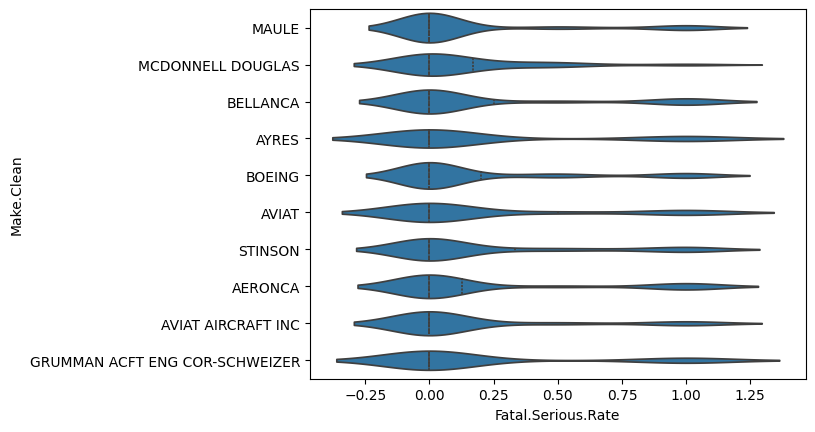

In [14]:
small_make_stats = (
    small_df.groupby("Make.Clean", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)
small_low10_makes = small_make_stats.head(10).index.tolist()
small_violin_data = small_df[small_df["Make.Clean"].isin(small_low10_makes)].copy()
sns.violinplot(
    data=small_violin_data,
    x="Fatal.Serious.Rate",
    y="Make.Clean",
    inner="quartile",
)

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

<Axes: xlabel='Fatal.Serious.Rate', ylabel='Make.Clean'>

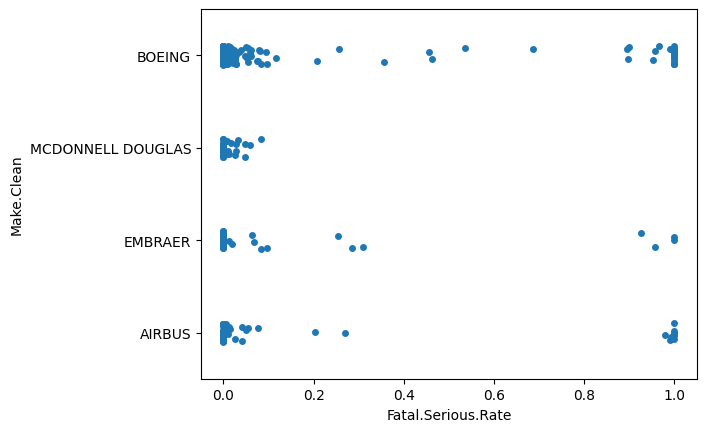

In [15]:
large_make_stats = (
    large_df.groupby("Make.Clean", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .query("n_events >= @min_events_per_make")
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)

large_low10_makes = large_make_stats.head(10).index.tolist()
large_strip_data = large_df[large_df["Make.Clean"].isin(large_low10_makes)].copy()

sns.stripplot(
    data=large_strip_data,
    x="Fatal.Serious.Rate",
    y="Make.Clean",
)

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [16]:
def best_makes_by_destruction(frame, label):
    out = (
        frame.groupby("Make.Clean", dropna=True)
        .agg(
            n_events=("Event.Id", "count"),
            destroyed_rate=("Was.Destroyed", "mean")
        )
        .sort_values(["destroyed_rate", "n_events"], ascending=[True, False])
        .head(15)
        .reset_index()
    )
    out["Size.Group"] = label
    return out
  
small_destroy_top15 = best_makes_by_destruction(small_df, "Small (<=20)")
large_destroy_top15 = best_makes_by_destruction(large_df, "Large (>20)")

display(small_destroy_top15)
display(large_destroy_top15)

,Make.Clean,n_events,destroyed_rate,Size.Group
0,LUSCOMBE,141,0.014184,Small (<=20)
1,GRUMMAN ACFT ENG COR-SCHWEIZER,58,0.017241,Small (<=20)
2,STINSON,129,0.023256,Small (<=20)
3,TAYLORCRAFT,93,0.032258,Small (<=20)
4,AERONCA,200,0.035000,Small (<=20)
5,ERCOUPE,52,0.038462,Small (<=20)
6,AMERICAN CHAMPION AIRCRAFT,51,0.039216,Small (<=20)
7,AVIAT AIRCRAFT INC,76,0.039474,Small (<=20)
8,MAULE,215,0.041860,Small (<=20)
9,DEHAVILLAND,93,0.043011,Small (<=20)


,Make.Clean,n_events,destroyed_rate,Size.Group
0,EMBRAER,51,0.078431,Large (>20)
1,BOEING,297,0.090909,Large (>20)
2,MCDONNELL DOUGLAS,38,0.105263,Large (>20)
3,AIRBUS,68,0.132353,Large (>20)
4,DE HAVILLAND,7,0.142857,Large (>20)
5,BEECH,1,1.000000,Large (>20)


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
# For small aircraft makes, destruction rates are generally low among several makes with decent sample sizes. The lowest rates were for LUSCOMBE (1.4%, n=141), STINSON (2.3%, n=129), AERONCA (3.5%, n=200), and MAULE (4.2%, n=215).  
# CESSNA has a higher destruction rate than those top niche makes (9.6%), but it has by far the largest sample (n=7025), so its estimate is likely more stable and operationally important.  
# For large aircraft makes, the best destruction rates were EMBRAER (7.8%, n=51), BOEING (9.1%, n=297), MCDONNELL DOUGLAS (10.5%, n=38), and AIRBUS (13.2%, n=68).  
# I would exclude DE HAVILLAND (n=7) and BEECH (n=1) from recommendations because their sample sizes are too small for statistically robust conclusions.  
# Overall, based on destruction risk alone, my recommendations are LUSCOMBE/STINSON/AERONCA/MAULE for smaller aircraft and EMBRAER/BOEING for larger aircraft.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

<Axes: xlabel='mean_fatal_serious_rate', ylabel='Plane.Type'>

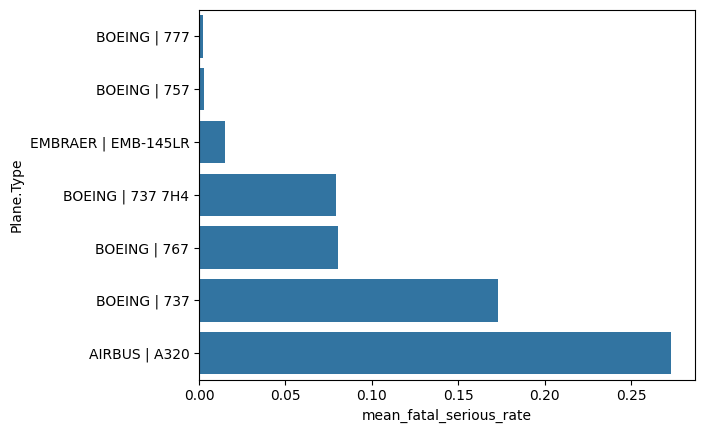

In [36]:
min_events_per_type = 10
    
large_type_stats = (
    large_df.groupby("Plane.Type", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .query("n_events >= @min_events_per_type")
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)

plot_large = large_type_stats.head(15).reset_index()

# Mean rate plot
sns.barplot(
    data=plot_large.sort_values("mean_fatal_serious_rate"),
    x="mean_fatal_serious_rate",
    y="Plane.Type",
)

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

,n_events,mean_fatal_serious_rate
Make.Clean,,
MCDONNELL DOUGLAS,28,0.141071
AVIAT AIRCRAFT INC,76,0.164474
MAULE,215,0.164806
BOEING,255,0.189450
GRUMMAN ACFT ENG COR-SCHWEIZER,58,0.206897
AYRES,52,0.215686
STINSON,129,0.216408
AVIAT,69,0.224638
BELLANCA,217,0.224654


,n_events,mean_fatal_serious_rate
Plane.Type,,
MAULE | M-5-210C,11,0.000000
BOEING | 737,42,0.066667
STINSON | 108-1,16,0.083333
AERONCA | 15AC,11,0.090909
BELLANCA | 7ECA,25,0.120000
MAULE | MX7,18,0.125000
BOEING | A75N1(PT17),31,0.139785
AVIAT | A-1B,21,0.142857
BELLANCA | 8GCBC,23,0.152174


<Axes: xlabel='mean_fatal_serious_rate', ylabel='Plane.Type'>

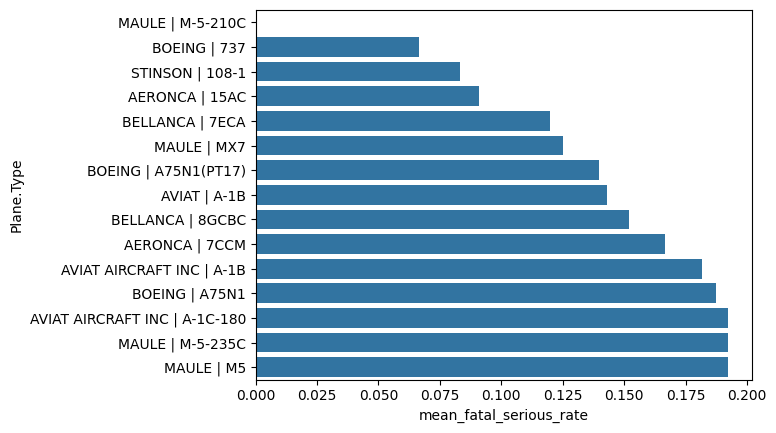

In [39]:
min_events_per_make = 20
min_events_per_type = 10

# Find top-10 small makes by mean fatal/serious injury rate
small_make_rank = (
    small_df.groupby("Make.Clean", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .query("n_events >= @min_events_per_make")
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)
top10_small_makes = small_make_rank.head(10).index.tolist()
display(small_make_rank.head(10))

# Keep only those makes
small_focus = small_df[small_df["Make.Clean"].isin(top10_small_makes)].copy()

# Ensure Plane.Type exists
if "Plane.Type" not in small_focus.columns:
    small_focus["Plane.Type"] = (
        small_focus["Make.Clean"].astype(str) + " | " + small_focus["Model.Clean"].astype(str)
    )
    
# Plane-type stats
small_type_stats = (
    small_focus.groupby("Plane.Type", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .query("n_events >= @min_events_per_type")
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)
display(small_type_stats.head(20))

# Plot top 15 safest small plane types
plot_small = small_type_stats.head(15).reset_index()
sns.barplot(
    data=plot_small.sort_values("mean_fatal_serious_rate"),
    x="mean_fatal_serious_rate",
    y="Plane.Type",
)

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
# For large aircraft types (minimum 10 events), the lowest mean fatal/serious injury fractions were seen for BOEING | 777 (0.0023, n=12), BOEING | 757 (0.0027, n=10), and EMBRAER | EMB-145LR (0.0150, n=10). BOEING | 737 appears frequently (n=76) with a higher mean injury fraction (0.1731), which makes it a more stable benchmark than very small-sample models. AIRBUS | A320 had the highest injury fraction among the large-type results shown (0.2733, n=11), so it is less favorable on this specific metric in this dataset.
# For small aircraft types (within the 10 best small makes, and at least 10 events), results are more variable. MAULE | M-5-210C shows a zero mean injury fraction (n=11), but this should be treated cautiously due to modest sample size. More stable small-type candidates include BELLANCA | 7ECA (0.1200, n=25), AVIAT | A-1B (0.1429, n=21), and AERONCA | 11AC (0.2321, n=28). Overall, recommendations should prioritize models with both low injury fractions and sufficient sample size, and should be cross-checked against destruction-rate findings from the prior section (not injury metric alone).

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.


=== Engine.Type (n >= 30) ===
Lowest injury-risk categories:


,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Engine.Type,,,
Turbo Fan,359,0.134666,0.097493
Reciprocating,12718,0.255988,0.078943
Turbo Jet,45,0.281937,0.244444
Turbo Prop,875,0.333008,0.192000
Unknown,2332,0.464806,0.247427


Lowest destruction-risk categories:


,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Engine.Type,,,
Reciprocating,12718,0.255988,0.078943
Turbo Fan,359,0.134666,0.097493
Turbo Prop,875,0.333008,0.192000
Turbo Jet,45,0.281937,0.244444
Unknown,2332,0.464806,0.247427


Top rows by size for Engine.Type:


,,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Engine.Type,Size.Group,,,
Turbo Jet,Large (>20),23,0.005173,0.000000
Turbo Fan,Large (>20),230,0.052938,0.047826
Unknown,Large (>20),199,0.163192,0.165829
Turbo Prop,Large (>20),10,0.231621,0.200000
Reciprocating,Small (<=20),12718,0.255988,0.078943
Turbo Fan,Small (<=20),129,0.280381,0.186047
Turbo Prop,Small (<=20),865,0.334180,0.191908
Unknown,Small (<=20),2133,0.492945,0.255040
Turbo Jet,Small (<=20),22,0.571281,0.500000


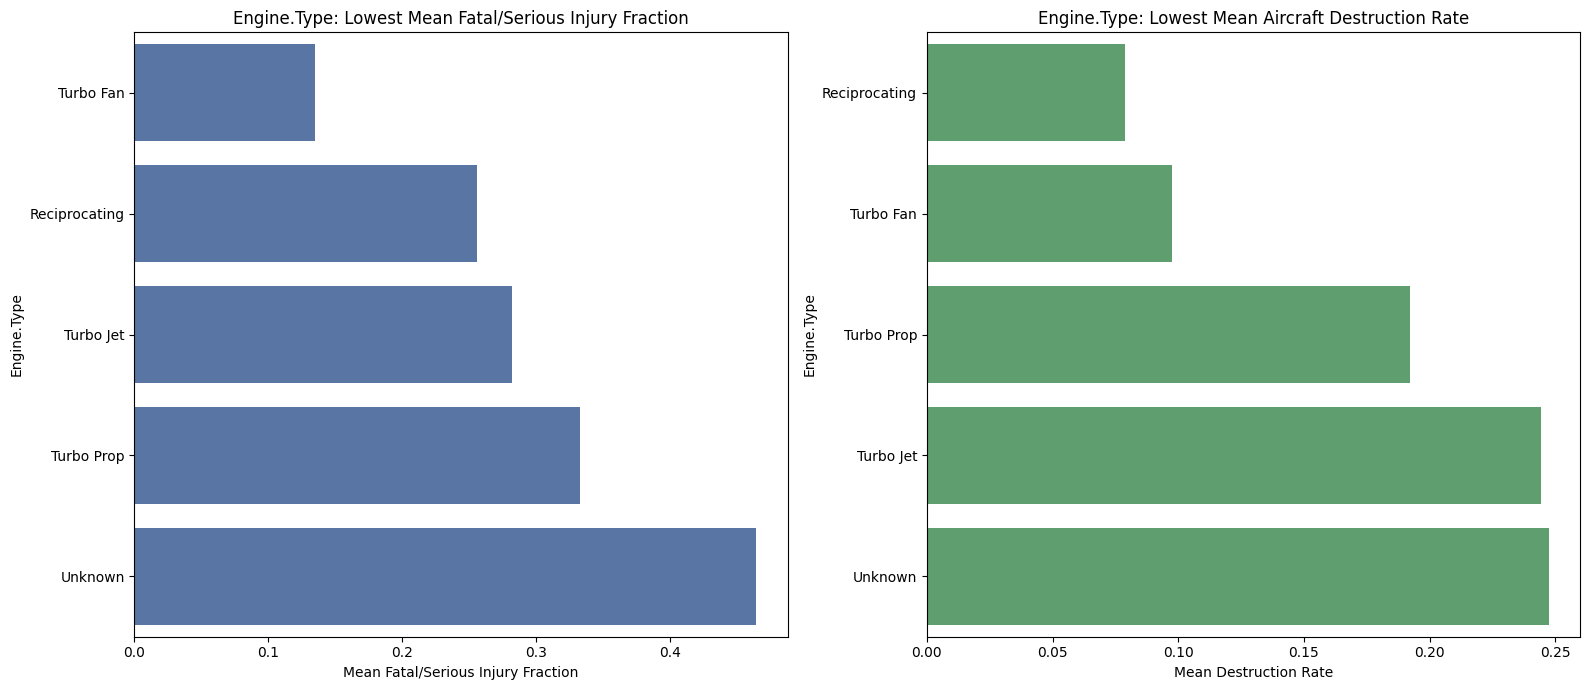


=== Purpose.of.flight (n >= 30) ===
Lowest injury-risk categories:


,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Purpose.of.flight,,,
Instructional,2382,0.170851,0.041982
Personal,9765,0.281305,0.093907
Aerial Application,720,0.297917,0.105556
Ferry,70,0.299379,0.114286
Positioning,253,0.303134,0.130435
Flight Test,68,0.303922,0.117647
Skydiving,156,0.308743,0.198718
Other Work Use,118,0.324148,0.101695
Business,393,0.324171,0.165394


Lowest destruction-risk categories:


,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Purpose.of.flight,,,
Instructional,2382,0.170851,0.041982
Banner Tow,86,0.424419,0.069767
Personal,9765,0.281305,0.093907
Other Work Use,118,0.324148,0.101695
Aerial Application,720,0.297917,0.105556
Ferry,70,0.299379,0.114286
Flight Test,68,0.303922,0.117647
Positioning,253,0.303134,0.130435
Business,393,0.324171,0.165394


Top rows by size for Purpose.of.flight:


,,n_events,mean_fatal_serious_rate,mean_destroyed_rate
Purpose.of.flight,Size.Group,,,
Unknown,Large (>20),456,0.098271,0.096491
Public Aircraft - Federal,Small (<=20),27,0.160494,0.037037
Instructional,Small (<=20),2382,0.170851,0.041982
Public Aircraft - State,Small (<=20),20,0.200000,0.000000
Personal,Small (<=20),9764,0.281329,0.093814
Ferry,Small (<=20),69,0.289855,0.115942
Aerial Application,Small (<=20),720,0.297917,0.105556
Positioning,Small (<=20),253,0.303134,0.130435
Skydiving,Small (<=20),153,0.306491,0.196078


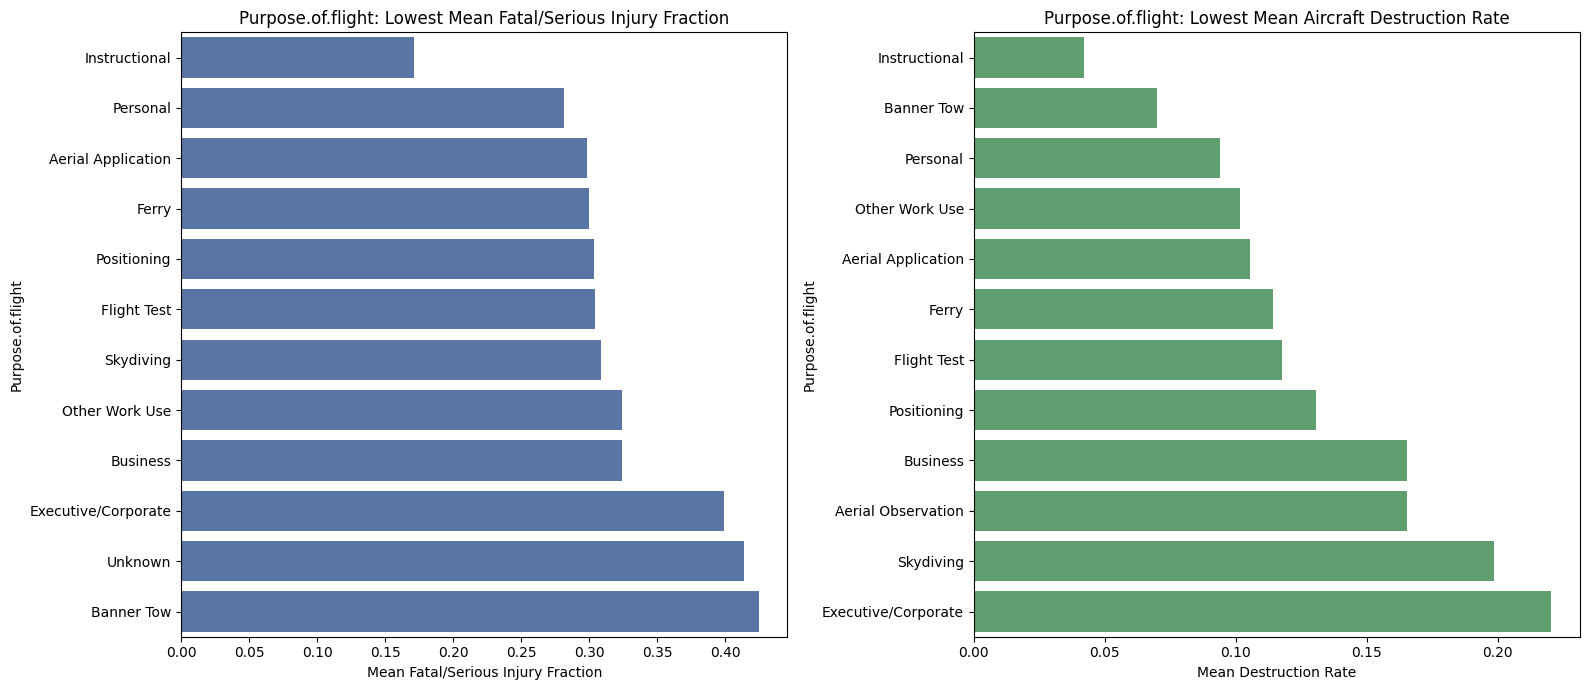

In [41]:
# Exploring Other Variables: Engine Type + Purpose of Flight
analysis_df = df.copy()

# Ensure Size.Group exists (for optional subgroup summaries)
if "Size.Group" not in analysis_df.columns:
    analysis_df["Size.Group"] = np.where(
        analysis_df["Estimated.Total.Occupants"] <= 20,
        "Small (<=20)",
        "Large (>20)"
    )
    
# Keep valid rows for both outcomes
analysis_df = analysis_df[
    analysis_df["Fatal.Serious.Rate"].notna()
    & analysis_df["Was.Destroyed"].notna()
].copy()

def analyze_factor(data, factor_col, min_n=30, top_k=12):
    tmp = data[[factor_col, "Fatal.Serious.Rate", "Was.Destroyed", "Event.Id", "Size.Group"]].copy()
    tmp[factor_col] = tmp[factor_col].astype("string").str.strip().fillna("Unknown")
    tmp.loc[tmp[factor_col].isin(["", "Unk", "UNK", "Unknown"]), factor_col] = "Unknown"
    
    # Overall summary
    summary = (
        tmp.groupby(factor_col, dropna=False)
        .agg(
            n_events=("Event.Id", "count"),
            mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean"),
            mean_destroyed_rate=("Was.Destroyed", "mean")
        )
        .sort_values("n_events", ascending=False)
    )
    
    robust = summary.query("n_events >= @min_n").copy()
    robust_injury = robust.sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
    robust_destroy = robust.sort_values(["mean_destroyed_rate", "n_events"], ascending=[True, False])
    
    print(f"\n=== {factor_col} (n >= {min_n}) ===")
    print("Lowest injury-risk categories:")
    
    display(robust_injury.head(10))
    print("Lowest destruction-risk categories:")
    display(robust_destroy.head(10))
    
    # Subgroup summary by aircraft size
    by_size = (
        tmp.groupby([factor_col, "Size.Group"])
        .agg(
            n_events=("Event.Id", "count"),
            mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean"),
            mean_destroyed_rate=("Was.Destroyed", "mean")
        )
        .query("n_events >= 10")
        .sort_values(["Size.Group", "mean_fatal_serious_rate", "n_events"], ascending=[True, True, False])
    )
    
    print(f"Top rows by size for {factor_col}:")
    display(by_size.head(20))
    
    # Plots (top_k safest categories by each metric)
    plot_injury = robust_injury.head(top_k).reset_index()
    plot_destroy = robust_destroy.head(top_k).reset_index()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    sns.barplot(
        data=plot_injury.sort_values("mean_fatal_serious_rate"),
        x="mean_fatal_serious_rate", y=factor_col, ax=axes[0], color="#4C72B0"
    )
    
    axes[0].set_title(f"{factor_col}: Lowest Mean Fatal/Serious Injury Fraction")
    axes[0].set_xlabel("Mean Fatal/Serious Injury Fraction")
    axes[0].set_ylabel(factor_col)
    
    sns.barplot(
        data=plot_destroy.sort_values("mean_destroyed_rate"),
        x="mean_destroyed_rate", y=factor_col, ax=axes[1], color="#55A868"
    )
    
    axes[1].set_title(f"{factor_col}: Lowest Mean Aircraft Destruction Rate")
    axes[1].set_xlabel("Mean Destruction Rate")
    axes[1].set_ylabel(factor_col)
    
    plt.tight_layout()
    plt.show()
    
analyze_factor(analysis_df, "Engine.Type", min_n=30, top_k=12)
analyze_factor(analysis_df, "Purpose.of.flight", min_n=30, top_k=12)